1.) Starting with less no of parameters but gradually increase the no of the kernels.

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

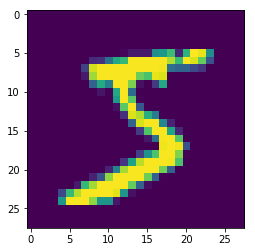

In [1]:
# https://keras.io/
!pip install -q keras
import keras   # This cell is used to import keras.
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()  #The Keras deep learning library provides a convenience method for loading the MNIST dataset.
                                                           #load (downloaded if needed) the MNIST dataset.

print (X_train.shape)   # Print the shape of the input image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])   # Print the 1st input image
# For a multi-layer perceptron model we must reduce the images down into a vector of pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# normalize input from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

In [2]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22

model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 10)        330       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [5]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.1873 - acc: 0.9389 - val_loss: 0.0679 - val_acc: 0.9791
Epoch 2/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0617 - acc: 0.9806 - val_loss: 0.0461 - val_acc: 0.9843
Epoch 3/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0468 - acc: 0.9855 - val_loss: 0.0392 - val_acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0377 - acc: 0.9875 - val_loss: 0.0362 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0311 - acc: 0.9907 - val_loss: 0.0251 - val_acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0291 - acc: 0.9909 - val_loss: 0.0350 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0247 - acc: 0.9922 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [7]:
print(score)

[0.03139630767255631, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [12]:
print(y_pred[:9])
print(y_test[:20])

[[1.79431066e-16 7.09426495e-13 8.53772164e-09 7.33203012e-11
  4.87183027e-22 6.28345253e-18 2.80916050e-24 1.00000000e+00
  1.31901411e-14 6.60637994e-13]
 [7.56905226e-13 1.12703839e-10 1.00000000e+00 1.38865906e-15
  6.62144380e-20 3.51824012e-23 7.24218108e-09 2.91485806e-21
  1.18958955e-12 1.82683110e-19]
 [4.83678158e-12 9.99999881e-01 4.50275417e-09 6.17985134e-12
  2.79706800e-08 2.43530813e-08 3.75660267e-11 1.25018019e-07
  1.36777363e-08 3.61121660e-10]
 [1.00000000e+00 4.82406304e-14 1.71519949e-12 2.24411554e-15
  6.57263965e-11 9.25192908e-12 1.51958268e-08 4.22128763e-14
  6.16651218e-12 2.95955732e-10]
 [6.11827694e-20 2.64246226e-13 2.42480850e-17 5.68114818e-20
  1.00000000e+00 6.27863327e-19 1.13199429e-16 1.18720196e-17
  1.89258873e-14 1.16070435e-11]
 [2.37257852e-11 9.99997854e-01 1.25866370e-06 4.65352800e-12
  5.29087707e-09 4.29792209e-11 1.13713920e-10 7.72697035e-07
  5.57693234e-08 7.11417980e-10]
 [1.78968242e-23 5.43721804e-11 1.50069291e-12 1.82838696e

In [0]:
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()

7


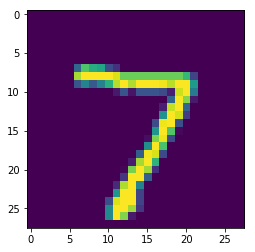

In [22]:
plt.imshow(X_test1[0])
print(y_test1[0])